# Libraries 

In [1]:
# trio!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ML
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Import Train/Test Set

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
features_list = ['ambient', 'coolant', 'u_d', 'u_q', 'motor_speed', 'i_d', 'i_q']
target_list = ['stator_yoke']

In [4]:
X_train = df_train[features_list].to_numpy()
y_train = df_train[target_list].to_numpy()

In [5]:
X_train.shape, y_train.shape

((942653, 7), (942653, 1))

In [6]:
X_test = df_test[features_list].to_numpy()
y_test = df_test[target_list].to_numpy()

In [7]:
X_test.shape, y_test.shape

((55393, 7), (55393, 1))

# Data Preprocessing

In [8]:
X_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

In [9]:
X_train_scaled = X_scaler.fit_transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [10]:
y_train_scaled = y_scaler.fit_transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

# Predictive Models

## Linear Regression

In [11]:
lr = LinearRegression()

In [12]:
lr.fit(X_train, y_train)

LinearRegression()

In [13]:
lr.score(X_test, y_test)

0.8262629515726762

In [14]:
y_pred_lr = lr.predict(X_test)

RMSE: 0.3935546470824477


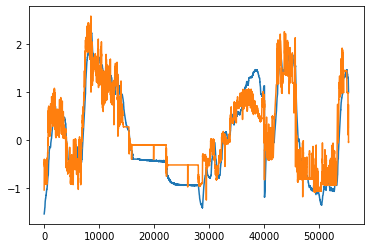

In [15]:
plt.plot(y_test)
plt.plot(y_pred_lr)
rmse_lr = mean_squared_error(y_test, y_pred_lr, squared=False)
print(f'RMSE: {rmse_lr}')

## Ridge

In [16]:
ridge = Ridge()

In [17]:
ridge.fit(X_train_scaled, y_train_scaled)

Ridge()

In [18]:
ridge.score(X_test_scaled, y_test_scaled)

0.8262574124812904

In [19]:
y_pred_ridge = ridge.predict(X_test_scaled)

RMSE: 2.853662723418985


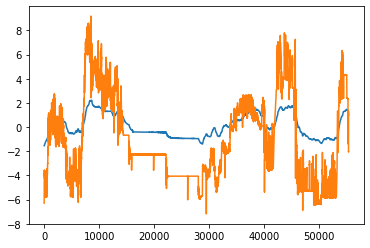

In [20]:
plt.plot(y_test)
plt.plot(y_scaler.inverse_transform(y_pred_lr))
rmse_ridge = mean_squared_error(y_test, y_scaler.inverse_transform(y_pred_lr), squared=False)
print(f'RMSE: {rmse_ridge}')

## Decision Tree Regressor

In [21]:
dt_reg = DecisionTreeRegressor(max_depth=5)

In [22]:
dt_reg.fit(X_train_scaled, y_train_scaled)

DecisionTreeRegressor(max_depth=5)

In [23]:
dt_reg.score(X_test_scaled, y_test_scaled)

0.7653432709662621

In [24]:
y_pred_dt_reg = dt_reg.predict(X_test_scaled)

RMSE: 0.4573780637520573


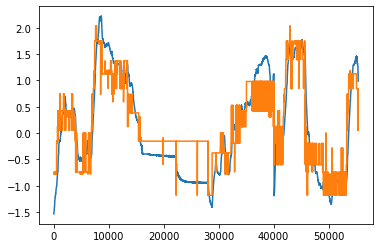

In [25]:
plt.plot(y_test)
plt.plot(y_scaler.inverse_transform(y_pred_dt_reg.reshape(-1, 1)))
rmse_dt_reg = mean_squared_error(y_test, y_scaler.inverse_transform(y_pred_dt_reg.reshape(-1, 1)), squared=False)
print(f'RMSE: {rmse_dt_reg}')

## Random Forest Regressor 

In [26]:
rf_reg = RandomForestRegressor(max_depth=5)

In [27]:
rf_reg.fit(X_train_scaled, y_train_scaled.reshape(-1))

RandomForestRegressor(max_depth=5)

In [28]:
rf_reg.score(X_test_scaled, y_test_scaled.reshape(-1))

0.7771965886150216

In [29]:
y_pred_rf_reg = rf_reg.predict(X_test_scaled)

RMSE: 0.44567650876908865


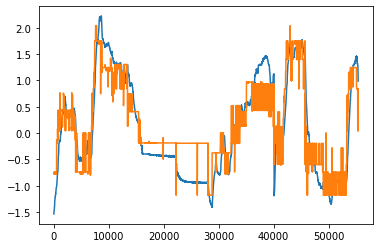

In [30]:
plt.plot(y_test)
plt.plot(y_scaler.inverse_transform(y_pred_rf_reg.reshape(-1, 1)))
rmse_rf_reg = mean_squared_error(y_test, y_scaler.inverse_transform(y_pred_rf_reg.reshape(-1, 1)), squared=False)
print(f'RMSE: {rmse_rf_reg}')